In [1]:
%load_ext autoreload
%autoreload 2
import torch
from torch.utils.data import DataLoader
from utils.dataset import arc_dataset
from utils.model import UNet
from utils.train import train
from matplotlib import pyplot as plt

data = arc_dataset('./data/train/full_out/')

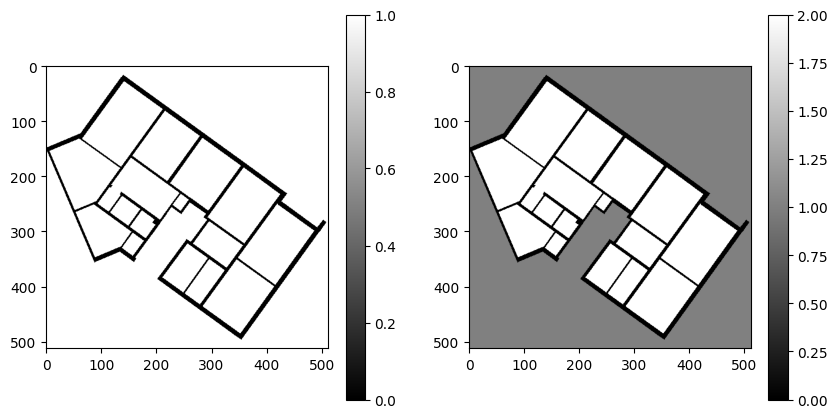

In [2]:
full_image = data.random_show_data()
test_image = torch.from_numpy(full_image).unsqueeze(0).unsqueeze(0).float()

In [22]:
model = UNet(1,3)
data = arc_dataset('./data/train/full_out/')
train_model = train(model,data,2,4)
train_model.dataset_split([0.8,0.1,0.1])
load_path = './result/three_model.pth'

In [23]:
train_model.train('./result/4_model.pth')

  0%|          | 0/915 [00:00<?, ?it/s]

Step [1/915], Loss: 1.2816308736801147, Accuracy: 0.3139305114746094
Step [2/915], Loss: 1.0787338018417358, Accuracy: 0.4218926429748535
Step [3/915], Loss: 1.0953704118728638, Accuracy: 0.43479029337565106
Step [4/915], Loss: 0.9350935220718384, Accuracy: 0.49686503410339355
Step [5/915], Loss: 0.9384591579437256, Accuracy: 0.5280961990356445
Step [6/915], Loss: 0.808711051940918, Accuracy: 0.5651607513427734
Step [7/915], Loss: 0.7597582340240479, Accuracy: 0.5955389567783901
Step [8/915], Loss: 0.6564000844955444, Accuracy: 0.6241625547409058
Step [9/915], Loss: 0.7036367654800415, Accuracy: 0.6372177335951064
Step [10/915], Loss: 0.6077045798301697, Accuracy: 0.6538814544677735
Step [11/915], Loss: 0.6376254558563232, Accuracy: 0.672281872142445
Step [12/915], Loss: 0.6391170024871826, Accuracy: 0.6820394198099772
Step [13/915], Loss: 0.53135085105896, Accuracy: 0.6959885083712064


KeyboardInterrupt: 

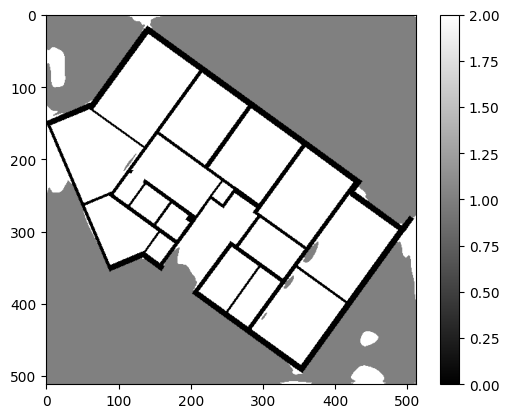

In [5]:
result_model = UNet(1,3)
result_model.load_state_dict(torch.load(load_path))
image = torch.from_numpy(full_image).unsqueeze(0).unsqueeze(0).float()
_,predict = torch.max(result_model(image),1)
predict = predict.squeeze(0).numpy()
plt.imshow(predict,cmap='gray')
plt.colorbar()
plt.show()

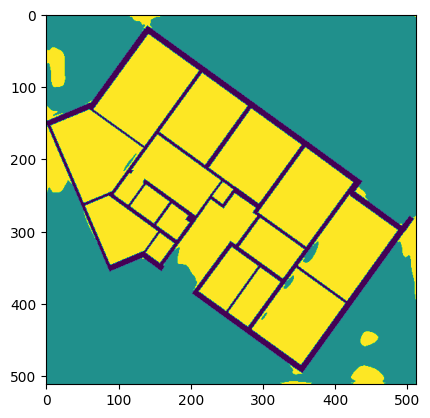

In [21]:
plt.imshow(torch.max(train_model.predict(full_image,load_path)(image.cuda()),1)[1].squeeze().cpu())

In [12]:
plt.imshow(train_model.predict(full_image,load_path).squeeze().cpu())

AttributeError: 'UNet' object has no attribute 'squeeze'